# Movies indusrty Exploration 

In [46]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

%matplotlib inline

In [3]:
#Reading in the data
df = pd.read_csv('movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
#checking if there is any missing data
for col in df.columns:
    perct_missing = np.mean(df[col].isnull())
    print('{} - {:0.2f}%'.format(col,perct_missing))

name - 0.00%
rating - 0.01%
genre - 0.00%
year - 0.00%
released - 0.00%
score - 0.00%
votes - 0.00%
director - 0.00%
writer - 0.00%
star - 0.00%
country - 0.00%
budget - 0.28%
gross - 0.02%
company - 0.00%
runtime - 0.00%


In [5]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [6]:
#Droping null values
df.dropna(inplace = True)

In [7]:
#Data types of the columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
#Change columns data types..
df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [9]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [10]:
#Extracting the year
df['release_year'] = df['released'].astype(str).str[8:13]

In [11]:
df.sort_values(by = ['gross'] , inplace = True , ascending = False)

In [12]:
#Checking if there is any duplicates
df.duplicated().sum()

0

Budget has hight correlation
Company will have a hight correlation

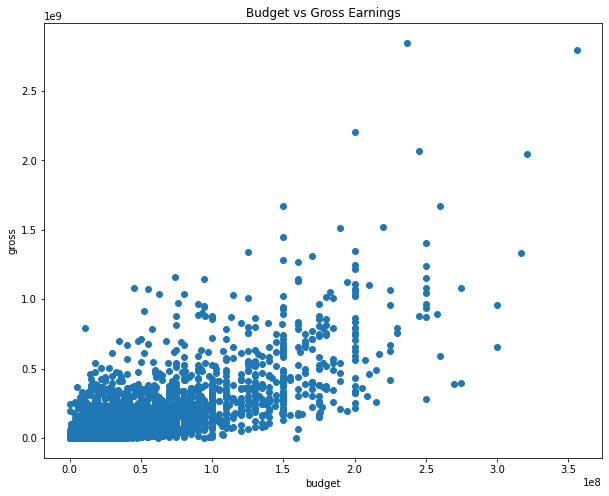

In [14]:
plt.figure(figsize = [10,8])

plt.scatter(data = df , x = 'budget' , y = 'gross')
plt.title('Budget vs Gross Earnings')
plt.xlabel('budget')
plt.ylabel('gross')
plt.show()

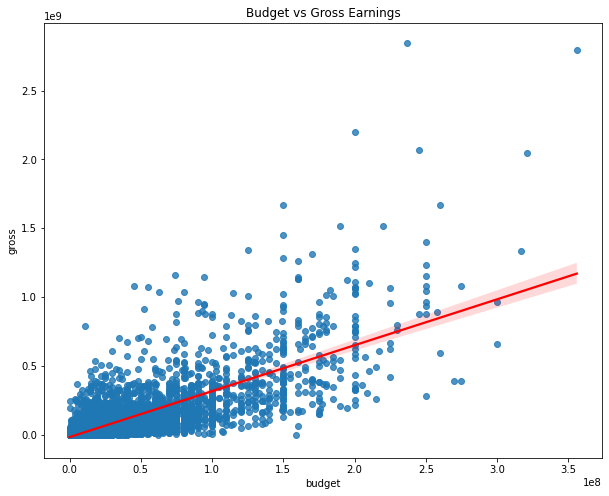

In [15]:
#plot buget verses gross using seaborn
plt.figure(figsize = [10,8])

sb.regplot(data = df , x = 'budget' , y = 'gross', line_kws = {'color':'red'})
plt.title('Budget vs Gross Earnings')
plt.xlabel('budget')
plt.ylabel('gross')
plt.show()

In [16]:
#Lets start looking at correlations

In [17]:
df.corr(method = 'pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


In [18]:
#High correlation between budget and gross
#I was right

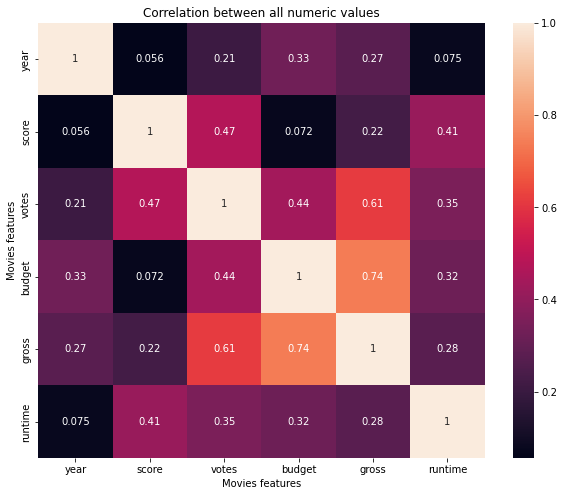

In [19]:
plt.figure(figsize = [10,8])

corretion_matrix = df.corr(method = 'pearson')
sb.heatmap(corretion_matrix,annot = True)
plt.title('Correlation between all numeric values')
plt.xlabel('Movies features')
plt.ylabel('Movies features')
plt.show()

In [23]:
df_numerized = df
for col in df_numerized.columns:
    if df_numerized[col].dtype == 'object':
        df_numerized[col] =   df_numerized[col].astype('category')
        df_numerized[col] =   df_numerized[col].cat.codes
        
       
    
    
df_numerized.head()



,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,11
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,83
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,12
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,11
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,83


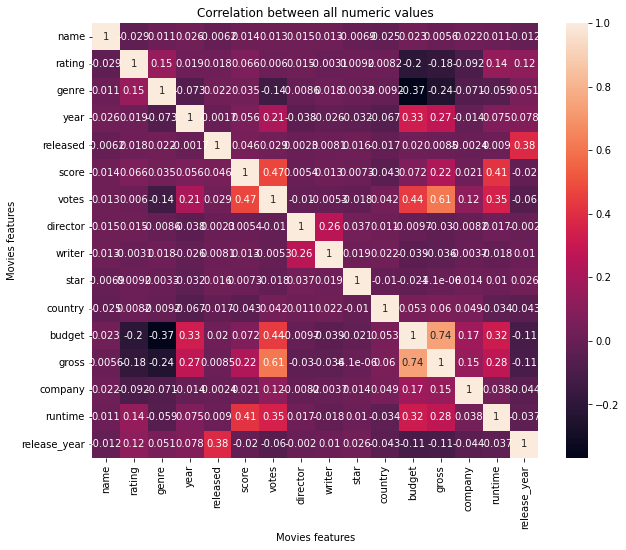

In [24]:
plt.figure(figsize = [10,8])

corretion_matrix = df_numerized.corr(method = 'pearson')
sb.heatmap(corretion_matrix,annot = True)
plt.title('Correlation between all numeric values')
plt.xlabel('Movies features')
plt.ylabel('Movies features')
plt.show()

In [44]:
#Tring to find the hights correlations
corr_pairs = corretion_matrix.unstack()
corr_pairs_sorted = corr_pairs.sort_values()

In [43]:
corr_pairs_sorted[(corr_pairs_sorted) > .5]

gross         votes           0.614751
votes         gross           0.614751
gross         budget          0.740247
budget        gross           0.740247
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
release_year  release_year    1.000000
dtype: float64

Votes and budget have the highest correlations to gross earnings
Company has low correlation
I was WRONG